In [1]:
autosave 0

Autosave disabled


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data.csv")

df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
df = df.drop(["Unnamed: 0", "track_id", "explicit", "mode", "key"], axis=1)

df.dropna(axis=0, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        113999 non-null  int64  
 4   duration_ms       113999 non-null  int64  
 5   danceability      113999 non-null  float64
 6   energy            113999 non-null  float64
 7   loudness          113999 non-null  float64
 8   speechiness       113999 non-null  float64
 9   acousticness      113999 non-null  float64
 10  instrumentalness  113999 non-null  float64
 11  liveness          113999 non-null  float64
 12  valence           113999 non-null  float64
 13  tempo             113999 non-null  float64
 14  time_signature    113999 non-null  int64  
 15  track_genre       113999 non-null  object 
dtypes: float64(9), int64(3), 

In [6]:
df['length_sec'] = df['duration_ms'] / 1000

df = df.drop(["duration_ms"], axis=1).astype({"popularity":"Int8", "time_signature":"Int8", "artists":"category", "album_name":"category", "track_genre":"category"})

In [7]:
df.head()

,artists,album_name,track_name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,length_sec
0,Gen Hoshino,Comedy,Comedy,73,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,230.666
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,149.610
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,210.826
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,201.933
4,Chord Overstreet,Hold On,Hold On,82,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,198.853


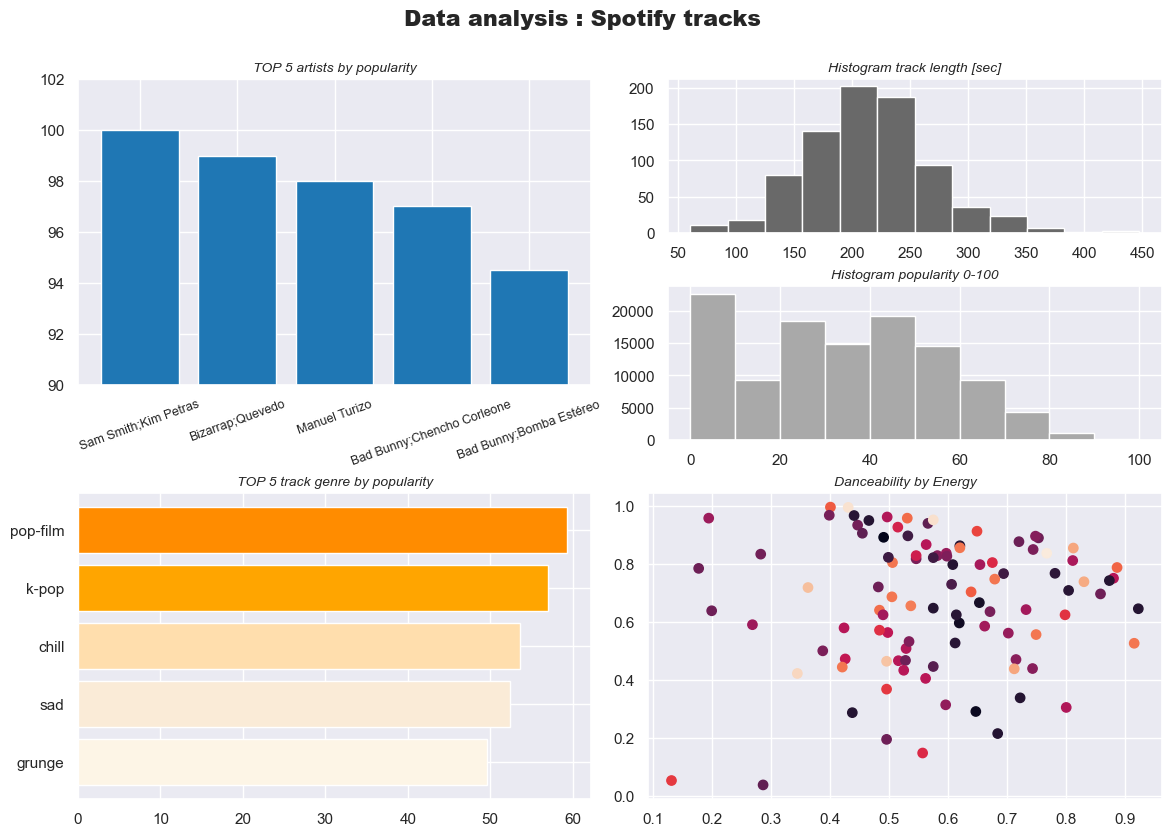

In [8]:
sns.set (rc = {'figure.figsize':(11.6, 8.25)})
sns.set_style('darkgrid')

hist = [["hist length_sec"], ["hist popularity"]]
outer_nested_mosaic = [["bar", hist], ["barh", "scatter"]]
axd = plt.figure(layout="constrained").subplot_mosaic(outer_nested_mosaic, empty_sentinel=None)
plt.suptitle('Data analysis : Spotify tracks \n', fontsize=16, fontweight='extra bold')
plt.rcParams['axes.titlesize'] = '10'

page1_1 = df.groupby('artists').agg({'popularity' : 'mean'}).sort_values('popularity', ascending=False).head()
axd["bar"].set_ylim([90, 102])
axd["bar"].tick_params(axis='x', labelrotation = 20, labelsize = 9)
axd["bar"].bar(x=page1_1.index, height=page1_1['popularity'], color ='tab:blue')
axd["bar"].set_title('TOP 5 artists by popularity', style='italic')

page1_2 = df.groupby('track_genre').agg({'popularity' : 'mean'}).sort_values('popularity').tail()
axd["barh"].barh(y=page1_2.index, width=page1_2['popularity'], color = ['oldlace', 'antiquewhite', 'navajowhite', 'orange', 'darkorange'])
axd["barh"].set_title('TOP 5 track genre by popularity', style='italic')

axd["hist length_sec"].hist(df['length_sec'].head(800), bins=12, color = 'dimgrey')
axd["hist length_sec"].set_title('Histogram track length [sec]', style='italic')

axd["hist popularity"].hist(df['popularity'], bins=10, color = 'darkgrey')
axd["hist popularity"].set_title('Histogram popularity 0-100', style='italic')

axd["scatter"].scatter(x=df['danceability'].sample(100, random_state=22334), y=df['energy'].sample(100, random_state=22334), c=df['energy'].head(100), s=45)
axd["scatter"].set_title('Danceability by Energy', style='italic')

plt.savefig('page1.pdf', format='pdf', dpi=300)
plt.show()

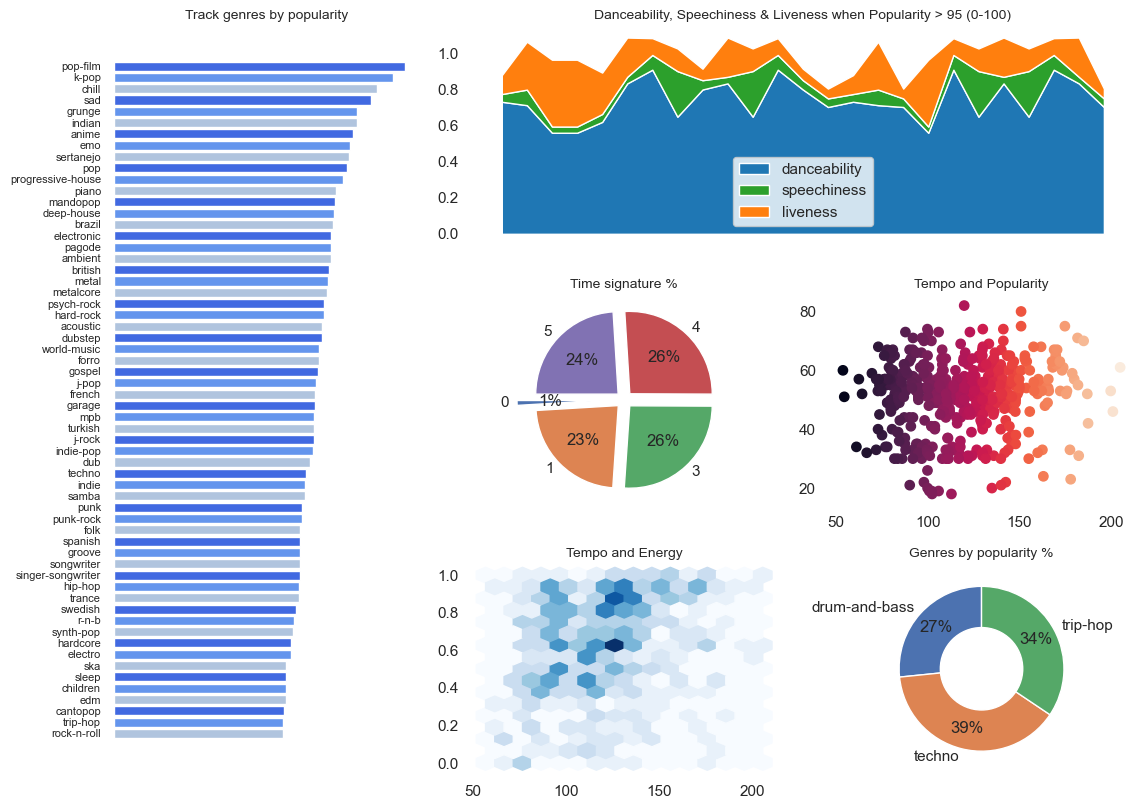

In [9]:
sns.set_style('white')
layout = [
    ["A", "B", "B"],
    ["A", "C", "D"],
    ["A", "E", "F"]
]

fig, axd = plt.subplot_mosaic(layout, figsize=(11.6, 8.25))
plt.rcParams['axes.titlesize'] = '10'

page2_1 = df.groupby('track_genre').agg({'popularity' : 'mean'}).sort_values('popularity').tail(60)
axd['A'].barh(y=page2_1.index, width=page2_1['popularity'], color = ['lightsteelblue', 'cornflowerblue', 'royalblue'])
axd['A'].tick_params(axis='y', labelsize = 8)
axd['A'].set_frame_on(False)
axd['A'].set_xticks([])
axd['A'].set_title('Track genres by popularity')

page2_2 = df.loc[df['popularity'] > 95, ['danceability', 'speechiness', 'liveness']].reset_index().drop(['index'], axis=1)
axd['B'].stackplot(page2_2.index, page2_2['danceability'], page2_2['speechiness'], page2_2['liveness'], colors=['tab:blue', 'tab:green', 'tab:orange'])
axd['B'].set_frame_on(False)
axd['B'].set_xticks([])
axd['B'].legend(page2_2.columns, loc='lower center')
axd['B'].set_title('Danceability, Speechiness & Liveness when Popularity > 95 (0-100)')

page2_3 = df.groupby('time_signature').agg({'tempo' : 'mean'})
axd['C'].pie(x=page2_3['tempo'] , startangle=180, labels=page2_3.index, autopct="%.0f%%", explode=(.3, .1, .1, .1, .1))
axd['C'].set_title('Time signature %')

axd['D'].scatter(x=df['tempo'].head(500), y=df['popularity'].head(500), c=df['tempo'].head(500), s=45)
axd['D'].set_frame_on(False)
axd['D'].set_ylim([15, 85])
axd['D'].set_title('Tempo and Popularity')

axd['E'].hexbin(x=df['tempo'].sample(500, random_state=12345), y=df['energy'].sample(500, random_state=12345), gridsize=15, cmap='Blues')
axd['E'].set_frame_on(False)
axd['E'].set_title('Tempo and Energy')

page2_6=df.groupby('track_genre').agg({'popularity' : 'mean'}).query("track_genre in ['techno', 'drum-and-bass', 'trip-hop']")
axd['F'].pie(x=page2_6['popularity'], startangle=90, labels=page2_6.index, autopct="%.0f%%", explode=(0, 0, 0), pctdistance=.75)
hole = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)
axd['F'].set_title('Genres by popularity %')

plt.tight_layout()
plt.savefig('page2.pdf', format='pdf', dpi=300)
plt.show()

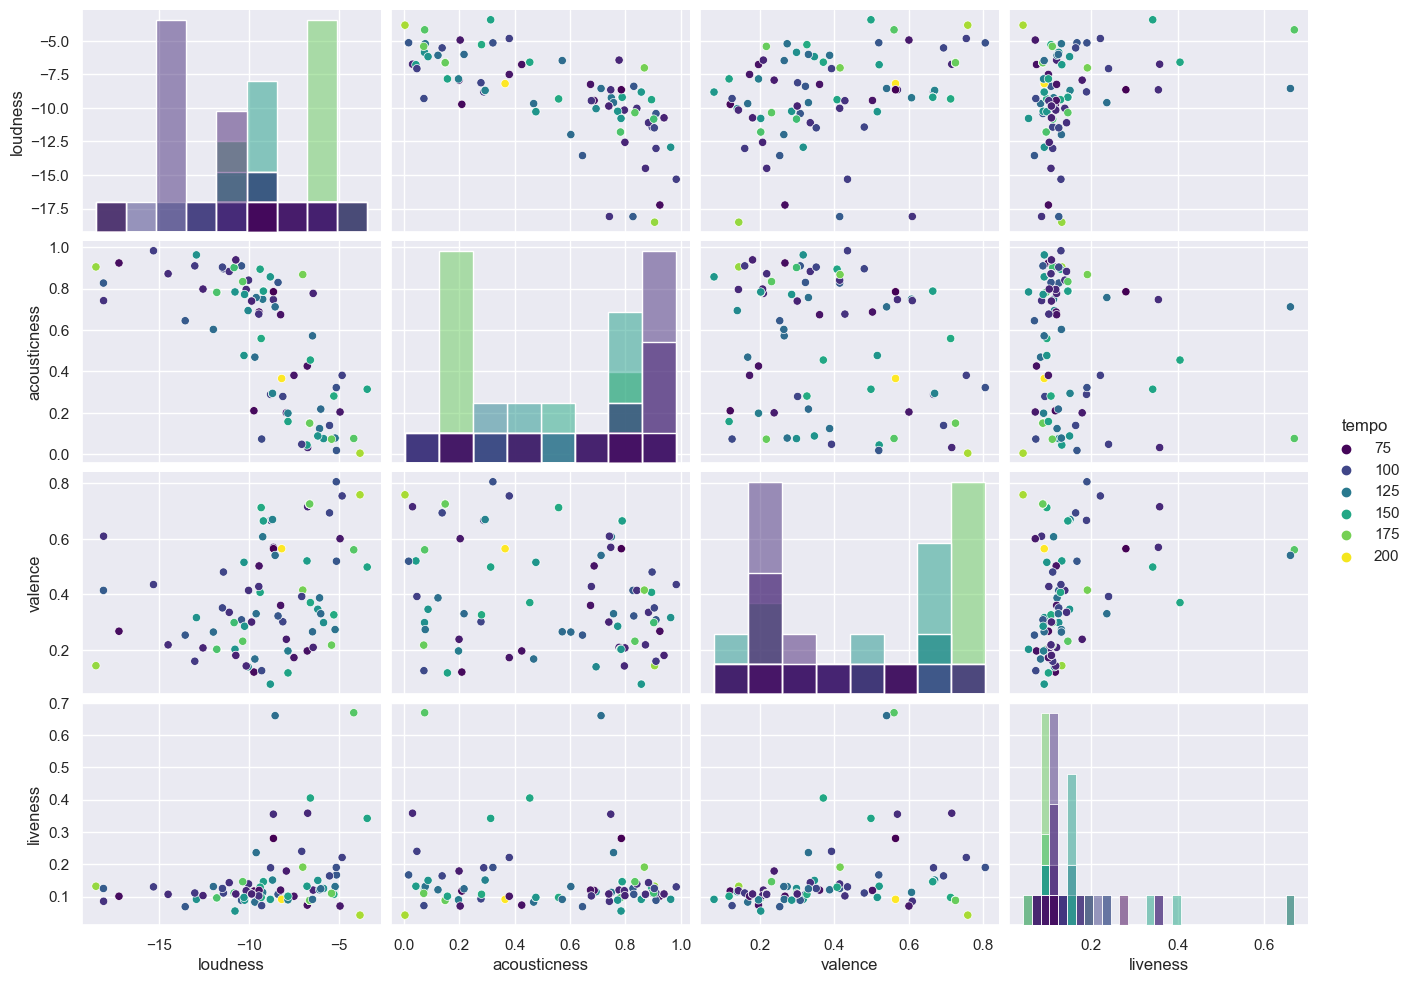

In [10]:
page3 = df[['loudness', 'acousticness', 'valence', 'liveness', 'tempo']].head(100)

sns.set_style('darkgrid')
sns.pairplot(page3, hue="tempo", diag_kind="hist", palette="viridis", aspect=1.33)

plt.savefig('page3.pdf', format='pdf', dpi=300)
plt.show()

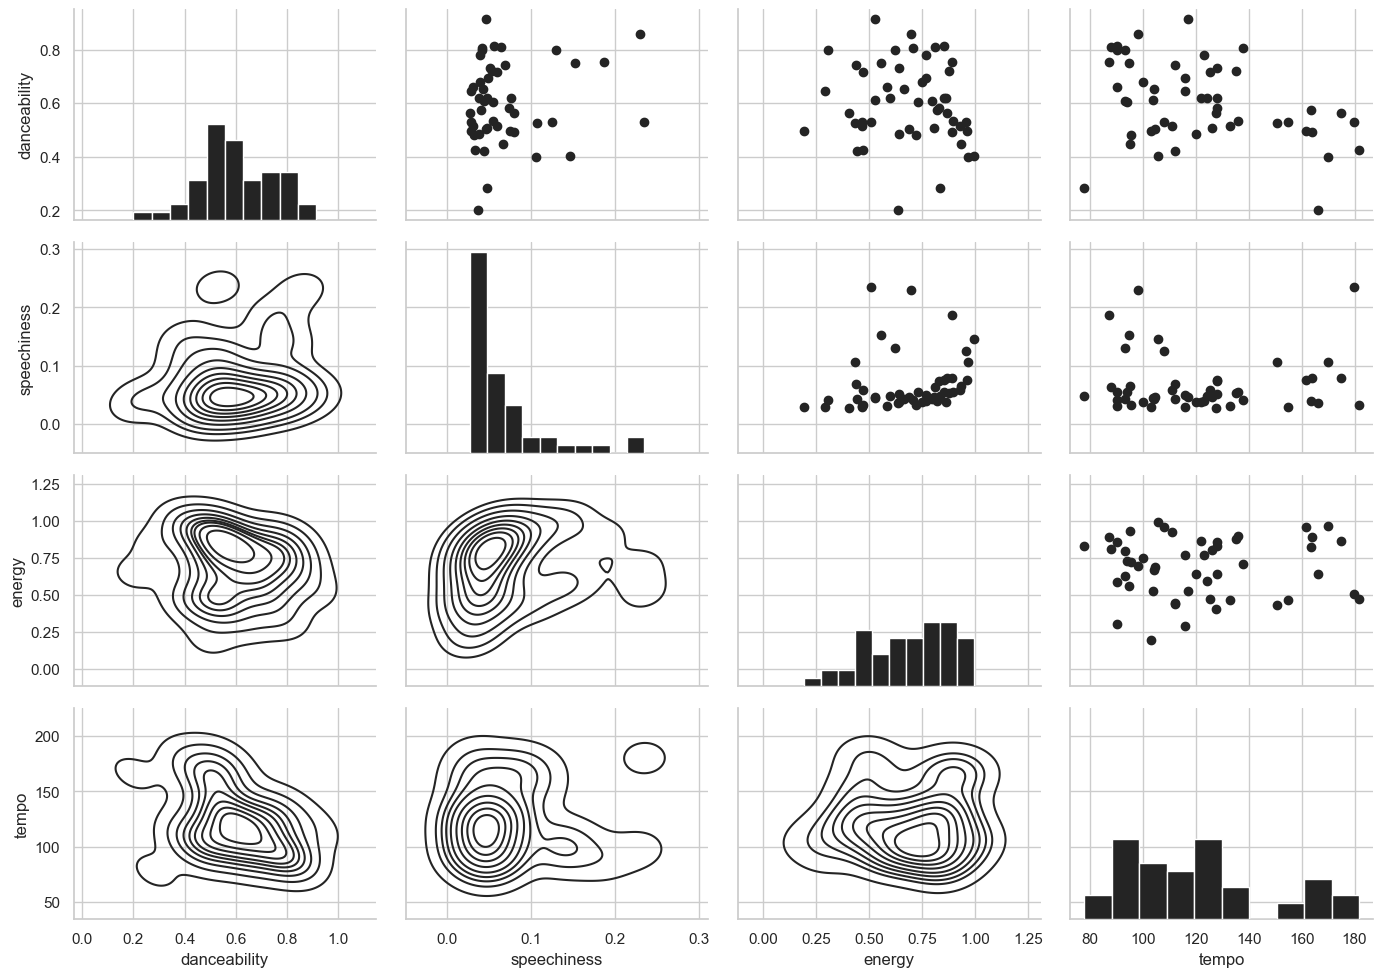

In [11]:
page4 = df[['danceability', 'speechiness', 'energy', 'tempo']].sample(50, random_state=22334).reset_index().drop(['index'], axis=1)

sns.set_theme(style="whitegrid", palette="gray")

g = sns.PairGrid(page4, aspect=1.41)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

plt.savefig('page4.pdf', format='pdf', dpi=300)
plt.show()

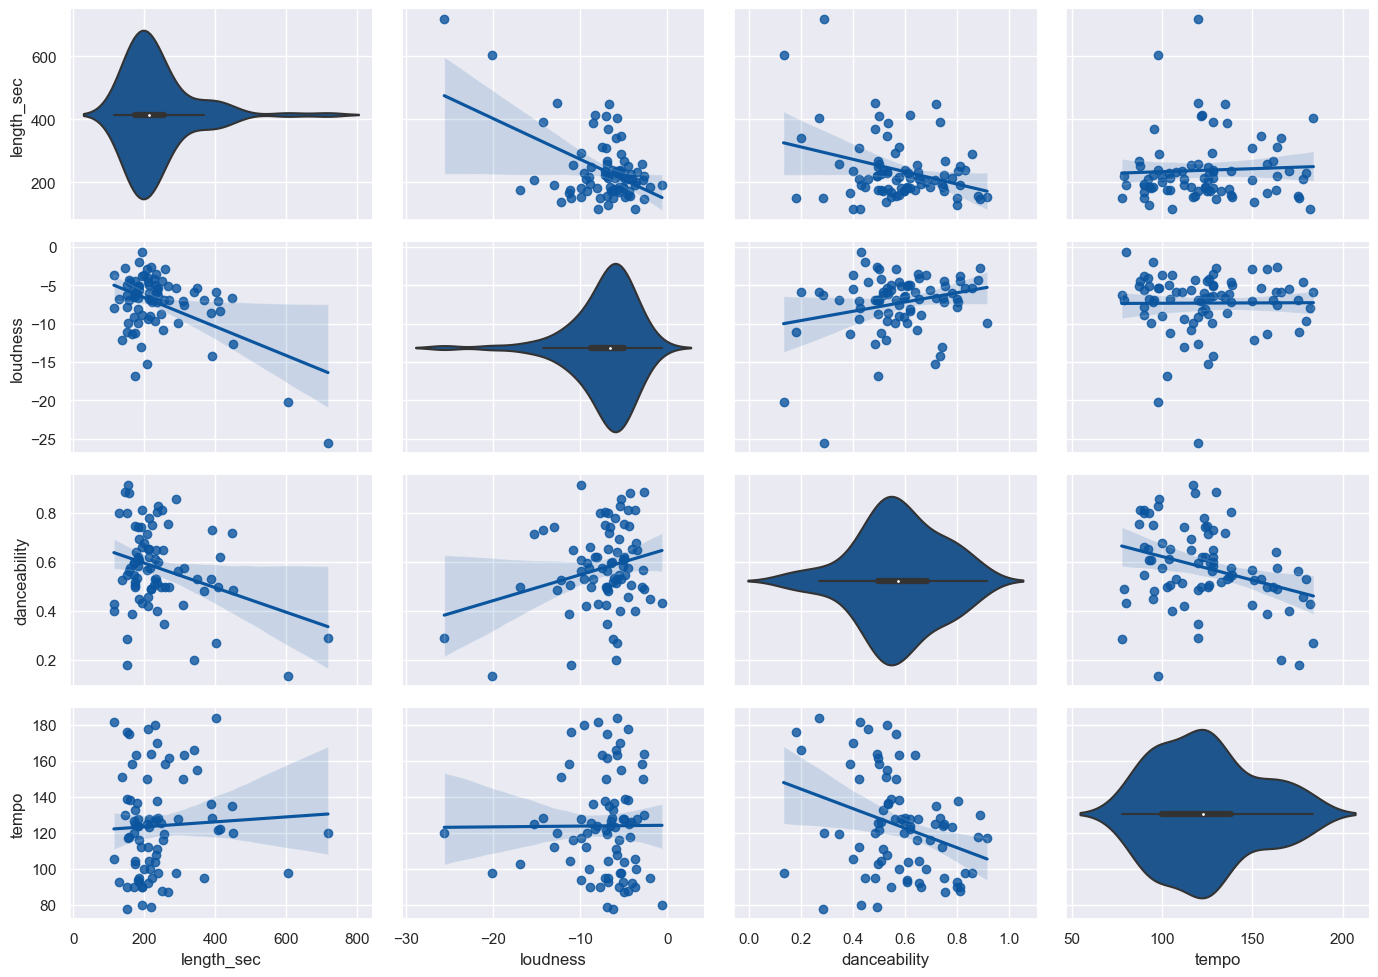

In [12]:
page5 = df[['length_sec', 'loudness', 'danceability', 'tempo']].sample(80, random_state=22334).reset_index().drop(['index'], axis=1)

sns.set_theme(style="darkgrid", palette="Blues_r")

g = sns.PairGrid(page5, aspect=1.41)
g.map_diag(sns.violinplot)
g.map_upper(sns.regplot)
g.map_lower(sns.regplot)

plt.savefig('page5.pdf', format='pdf', dpi=300)
plt.show()

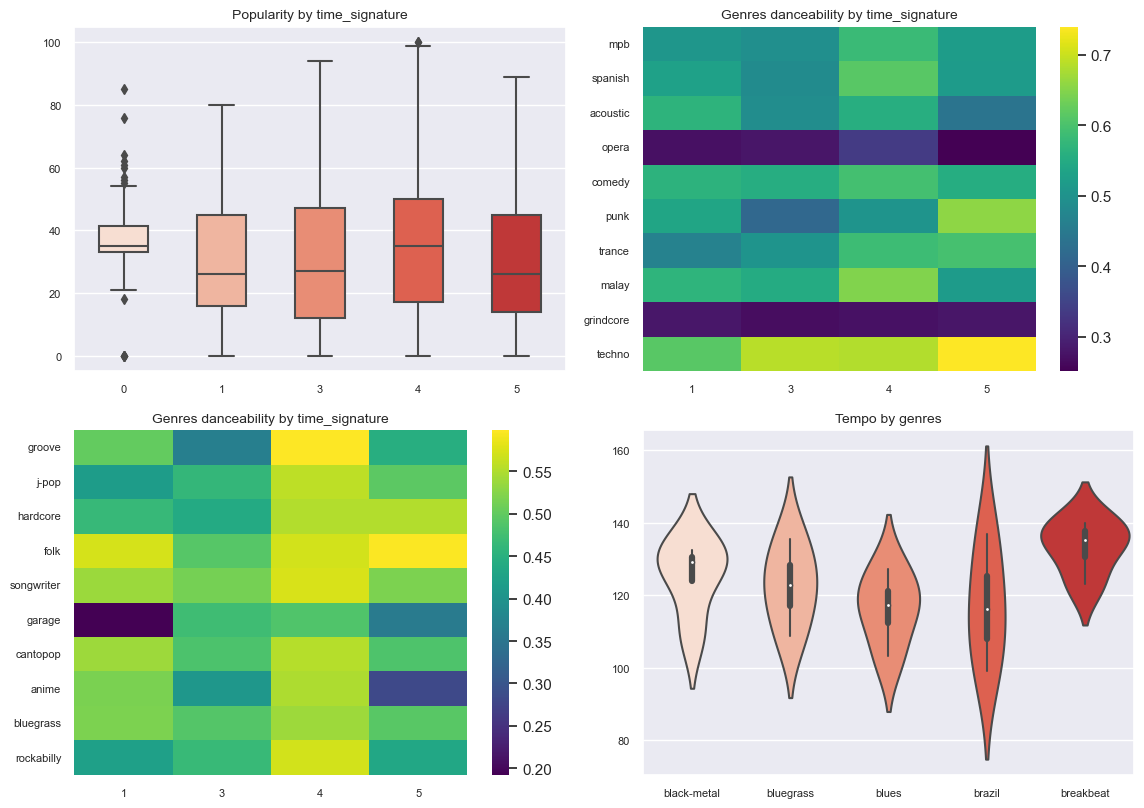

In [21]:
sns.set (rc = {'figure.figsize':(11.6, 8.25)})
sns.set_theme(style="darkgrid", palette="Reds")
fig, ax = plt.subplots(2, 2)
plt.rcParams['axes.titlesize'] = '10'

sns.boxplot(ax=ax[0][0], data=df, x='time_signature', y='popularity', width=.5)
ax[0][0].set_title('Popularity by time_signature')
ax[0][0].tick_params(axis='both', labelsize = 8)
ax[0][0].set_ylabel(None)
ax[0][0].set_xlabel(None)

sns.heatmap(df.pivot_table(index="track_genre", columns="time_signature", values={"danceability":"mean"}).droplevel(0, axis=1).sample(10, random_state=456789).drop([0], axis=1), ax = ax[0][1], cmap='viridis')
ax[0][1].set_title('Genres danceability by time_signature')
ax[0][1].tick_params(axis='both', labelsize = 8)
ax[0][1].set_ylabel(None)
ax[0][1].set_xlabel(None)

sns.heatmap(df.pivot_table(index="track_genre", columns="time_signature", values={"danceability":"mean"}).droplevel(0, axis=1).sample(10, random_state=56789).drop([0], axis=1), ax = ax[1][0], cmap='viridis')
ax[1][0].set_title('Genres danceability by time_signature')
ax[1][0].tick_params(axis='both', labelsize = 8)
ax[1][0].set_ylabel(None)
ax[1][0].set_xlabel(None)

sns.violinplot(data=df.copy().pivot_table(index="time_signature", columns="track_genre", values={"tempo":"mean"}).drop([0], axis=0).droplevel(0, axis=1).iloc[:, 6:11], ax=ax[1][1], width=0.9)
ax[1][1].set_title('Tempo by genres')
ax[1][1].tick_params(axis='both', labelsize = 8)
ax[1][1].set_xlabel(None)

fig.tight_layout()
plt.savefig('page6.pdf', format='pdf', dpi=300)
plt.show()

In [22]:
import os
import glob
from pypdf import PdfMerger

files = glob.glob(os.path.join('', '*.pdf'))
flist = [os.path.basename(file) for file in files]

merger = PdfMerger()
for pdf in flist:
    merger.append(pdf)
merger.write("Spotify tracks data analysis.pdf")
merger.close()